Saving Screenshot from 2024-06-07 13-32-11.png to Screenshot from 2024-06-07 13-32-11.png


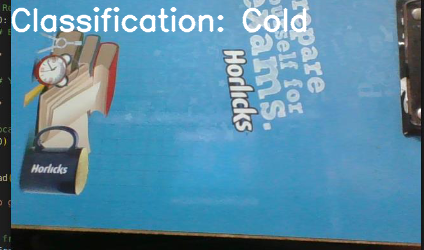

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Function to classify color
def classify_color(hsv_value):
    h, s, v = hsv_value
    if (0 <= h <= 10) or (160 <= h <= 180):
        return "Hot"  # Red
    elif 100 <= h <= 140:
        return "Cold"  # Blue
    elif 35 <= h <= 85:
        return "Natural"  # Green
    elif 20 <= h <= 30:
        return "Warm"  # Yellow
    else:
        return "Unknown"

# Upload image
uploaded = files.upload()

# Process the uploaded image
for filename in uploaded.keys():
    # Read the image from the uploaded file
    frame = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

    # Convert the image from BGR to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate the histogram to find the most predominant color
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    predominant_color_hue = np.argmax(hist)

    # Classify the color
    classification = classify_color((predominant_color_hue, 255, 255))

    # Display the classification on the image
    cv2.putText(frame, f"Classification: {classification}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the resulting frame
    cv2_imshow(frame)
